In [3]:
import numpy as np
import pandas as pd

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1926,ham,Dont give a monkeys wot they think and i certa...,NaN,NaN,NaN
2098,ham,"No dice, art class 6 thru 9 :( thanks though. ...",NaN,NaN,NaN
878,spam,U have a secret admirer who is looking 2 make ...,NaN,NaN,NaN
837,ham,"Sir, I have been late in paying rent for the p...",NaN,NaN,NaN
2686,ham,There r many model..sony ericson also der.. &l...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

### `DATA CLEANING:`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#Dropping unnamed:2 , unnamed:3, unnamed:4
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#renaming cols
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

In [11]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
"""  #encoding - label
0-ham
1-spam
"""

'  #encoding - label\n0-ham\n1-spam\n'

In [14]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [16]:
# duplicate values
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

### `EDA:`

In [19]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7cf5958741f0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

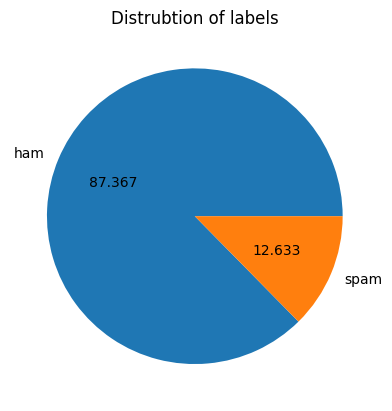

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Distrubtion of labels")
plt.pie(df['label'].value_counts(), labels = ['ham','spam'], autopct="%0.3f")

In [22]:
""" Data is imbalance as, ham-87% & spam-13%"""

' Data is imbalance as, ham-87% & spam-13%'

In [23]:

!pip install nltk
!pip3 install nltk

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['msg_length'] = df['message'].apply(len)

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
# calculating the no. of words in message
df['word_length'] = df['message'].apply(lambda ele:len(nltk.word_tokenize(ele)))

In [26]:
df

,label,message,word_length
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [34]:
# calculating the no. of sent in message
df['sent_length'] = df['message'].apply(lambda ele:len(nltk.sent_tokenize(ele)))

In [35]:
df

,label,message,word_length,sent_length
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4
5568,0,Will Ì_ b going to esplanade fr home?,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,2
5570,0,The guy did some bitching but I acted like i'd...,27,1


In [37]:
df['msg_length'] = df['message'].apply(lambda ele: len(ele))

In [38]:
df[['msg_length','word_length','sent_length']].describe()

,msg_length,word_length,sent_length
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# analyzing the data for the ham msg for these 3 features
df[df['label'] == 0][['msg_length','word_length','sent_length']].describe()

,msg_length,word_length,sent_length
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# analyzing the data for the spam msg for these 3 features
df[df['label'] == 1][['msg_length','word_length','sent_length']].describe()

,msg_length,word_length,sent_length
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
"""
Analysis is that spam has a avg length of 140 chars while ham has avg lenth of 70 chars in the message.
Which shows that spam msg are usually lengthy.
"""

'\nAnalysis is that spam has a avg length of 140 chars while ham has avg lenth of 70 chars in the message.\nWhich shows that spam msg are usually lengthy.\n'

In [42]:
import seaborn as sns

<Axes: xlabel='msg_length', ylabel='Count'>

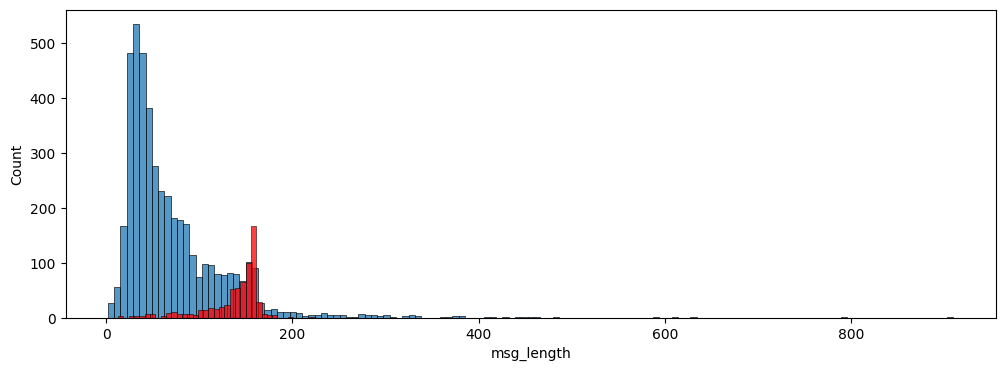

In [43]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label'] == 0]['msg_length'])   #ham
sns.histplot(df[df['label'] == 1]['msg_length'], color='red')   #spam

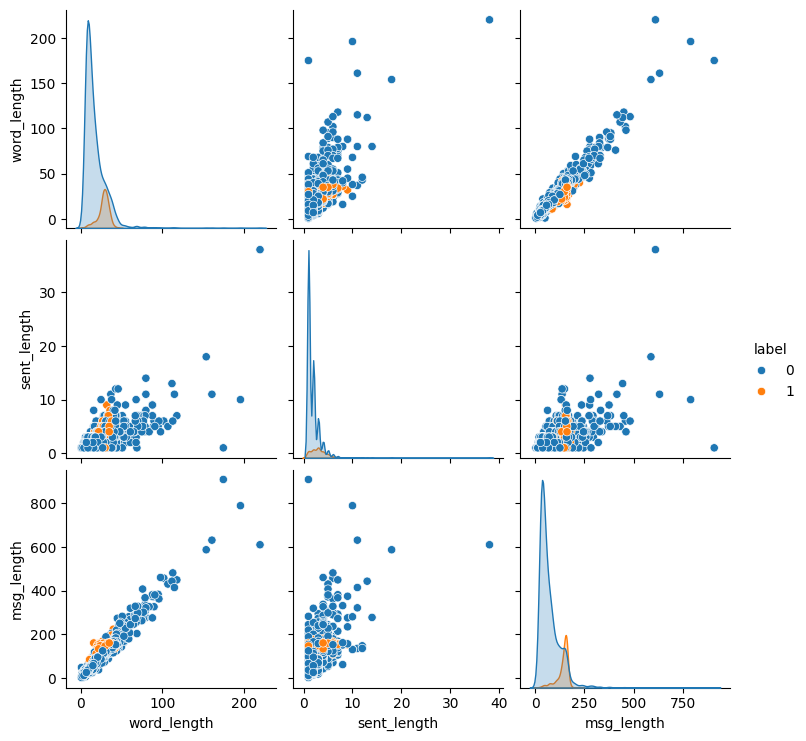

In [44]:
sns.pairplot(df,hue='label')

In [ ]:
"""
There is high corr with the features so, we will choose only one.
msg_length has high co relation with label.
"""

'\nThere is high corr with the features so, we will choose only one. \nmsg_length has high co relation with label.\n'

### `TEXT PREPROCESSING:`

In [46]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [47]:
"""import pandas as pd


import re

df['message'] = df['message'].astype(str)

# Tokenize the sentences
sentences = df['message'].apply(sent_tokenize)

# Initialize the stemmer
stemmer = PorterStemmer()

corpus = []

# Data processing
def transform_text(text):
    for sentence_list in sentences:
        for sentence in sentence_list:
            new_sent = re.sub('[^a-zA-Z]', ' ', sentence)  # Data cleaning step
            new_sent = new_sent.lower()  # Lowering
            new_sent = new_sent.split()  # Converting to words
            new_sent = [stemmer.stem(word) for word in new_sent if word not in set(stopwords.words('english'))]
            new_sent = ' '.join(new_sent)
            corpus.append(new_sent)


    return " ".join(corpus)
"""

'import pandas as pd\n\n\nimport re\n\ndf[\'message\'] = df[\'message\'].astype(str)\n\n# Tokenize the sentences\nsentences = df[\'message\'].apply(sent_tokenize)\n\n# Initialize the stemmer\nstemmer = PorterStemmer()\n\ncorpus = []\n\n# Data processing\ndef transform_text(text):\n    for sentence_list in sentences:\n        for sentence in sentence_list:\n            new_sent = re.sub(\'[^a-zA-Z]\', \' \', sentence)  # Data cleaning step\n            new_sent = new_sent.lower()  # Lowering\n            new_sent = new_sent.split()  # Converting to words\n            new_sent = [stemmer.stem(word) for word in new_sent if word not in set(stopwords.words(\'english\'))]\n            new_sent = \' \'.join(new_sent)\n            corpus.append(new_sent)\n\n\n    return " ".join(corpus)\n'

In [48]:
import string

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
df['transformed_text'] = df['message'].apply(transform_text)

In [52]:
df

,label,message,word_length,sent_length,msg_length,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,1,125,guy bitch act like interest buy someth els nex...


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='black')

In [54]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

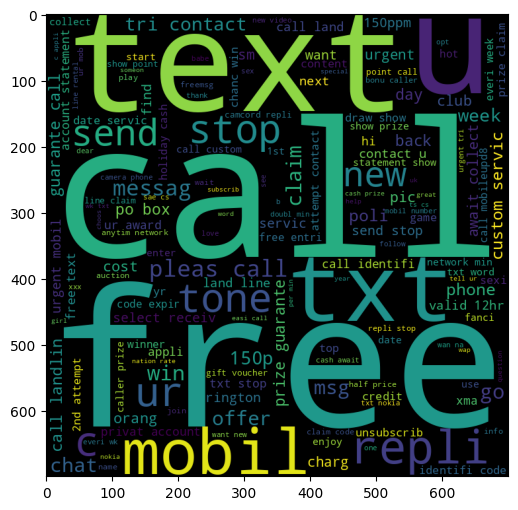

In [55]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

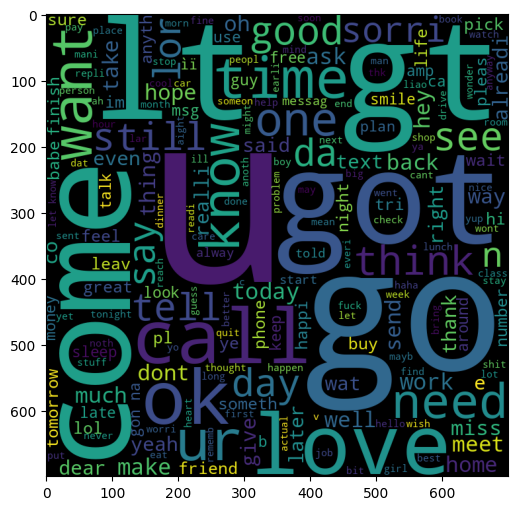

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter

In [61]:
word_counts = Counter(spam_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['most_freq','spam'])

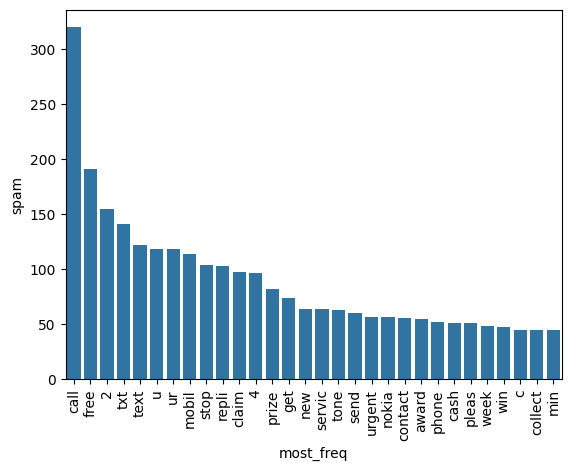

In [62]:
sns.barplot(data=df_word_counts, x='most_freq', y='spam')
plt.xticks(rotation='vertical')
plt.show()

### `MODEL BUILDING:`

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5169, 3000)

In [66]:
y = df['label'].values

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
# GaussianNB data
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score:", accuracy_score(y_test,y_pred1))
print("confusion_matrix:", confusion_matrix(y_test,y_pred1))
print("precision_score:", precision_score(y_test,y_pred1))

accuracy_score: 0.8736299161831077
confusion_matrix: [[1169  162]
 [  34  186]]
precision_score: 0.5344827586206896


In [71]:
# MultinomialNB data
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score:", accuracy_score(y_test,y_pred2))
print("confusion_matrix:", confusion_matrix(y_test,y_pred2))
print("precision_score:", precision_score(y_test,y_pred2))

accuracy_score: 0.9716312056737588
confusion_matrix: [[1329    2]
 [  42  178]]
precision_score: 0.9888888888888889


In [72]:
# BernoulliNB data
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score:", accuracy_score(y_test,y_pred3))
print("confusion_matrix:", confusion_matrix(y_test,y_pred3))
print("precision_score:", precision_score(y_test,y_pred3))

accuracy_score: 0.9742101869761445
confusion_matrix: [[1324    7]
 [  33  187]]
precision_score: 0.9639175257731959


In [73]:
"""
Applying different ML model on our dataset
"""

'\nApplying different ML model on our dataset\n'

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9698492462311558
For  KN
Accuracy -  0.9065119277885235
Precision -  1.0
For  NB
Accuracy -  0.9716312056737588
Precision -  0.9888888888888889
For  DT
Accuracy -  0.9348807221147647
Precision -  0.8650306748466258
For  LR
Accuracy -  0.9451966473243069
Precision -  0.8947368421052632
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9888268156424581
For  AdaBoost
Accuracy -  0.9542230818826564
Precision -  0.9116022099447514
For  BgC
Accuracy -  0.9600257898130239
Precision -  0.8726415094339622
For  ETC
Accuracy -  0.9774339136041263
Precision -  0.9946524064171123
For  GBDT
Accuracy -  0.9484203739522888
Precision -  0.9545454545454546
For  xgb
Accuracy -  0.9664732430689877
Precision -  0.9285714285714286


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906512,1.000000
8,ETC,0.977434,0.994652
2,NB,0.971631,0.988889
5,RF,0.970986,0.988827
0,SVC,0.978723,0.969849
9,GBDT,0.948420,0.954545
10,xgb,0.966473,0.928571
6,AdaBoost,0.954223,0.911602
4,LR,0.945197,0.894737
7,BgC,0.960026,0.872642


In [ ]:
"""
We will use either ETC or NB as their precision is high as well as they have decent accuracy.
"""

'\nWe will use either ETC or NB as their precision is high as well as they have decent accuracy.\n'

In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906512
1,ETC,Accuracy,0.977434
2,NB,Accuracy,0.971631
3,RF,Accuracy,0.970986
4,SVC,Accuracy,0.978723
5,GBDT,Accuracy,0.948420
6,xgb,Accuracy,0.966473
7,AdaBoost,Accuracy,0.954223
8,LR,Accuracy,0.945197
9,BgC,Accuracy,0.960026


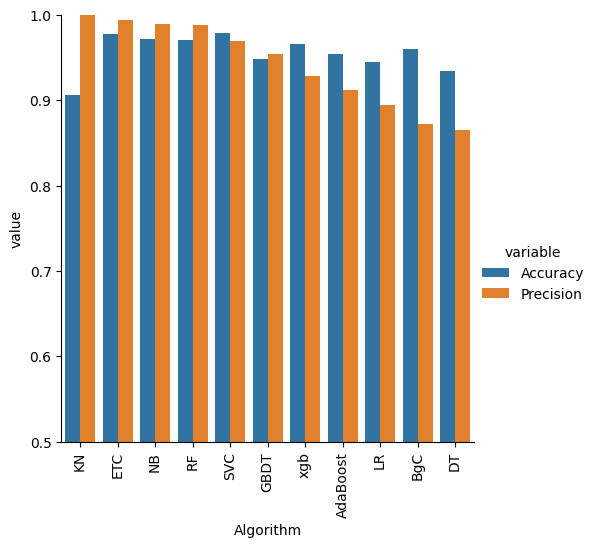

In [82]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### `IMPROVEMENT IN MODEL:`

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_msg_length':accuracy_scores,'Precision_msg_length':precision_scores}).sort_values('Precision_msg_length',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_msg_length,Precision_msg_length
0,KN,0.906512,1.000000,0.906512,1.000000,0.906512,1.000000,0.906512,1.000000
1,ETC,0.977434,0.994652,0.977434,0.994652,0.977434,0.994652,0.977434,0.994652
2,NB,0.971631,0.988889,0.971631,0.988889,0.971631,0.988889,0.971631,0.988889
3,RF,0.970986,0.988827,0.970986,0.988827,0.970986,0.988827,0.970986,0.988827
4,SVC,0.978723,0.969849,0.978723,0.969849,0.978723,0.969849,0.978723,0.969849
5,GBDT,0.948420,0.954545,0.948420,0.954545,0.948420,0.954545,0.948420,0.954545
6,xgb,0.966473,0.928571,0.966473,0.928571,0.966473,0.928571,0.966473,0.928571
7,AdaBoost,0.954223,0.911602,0.954223,0.911602,0.954223,0.911602,0.954223,0.911602
8,LR,0.945197,0.894737,0.945197,0.894737,0.945197,0.894737,0.945197,0.894737
9,BgC,0.960026,0.872642,0.960026,0.872642,0.960026,0.872642,0.960026,0.872642


In [89]:
temp_df

,Algorithm,Accuracy_msg_length,Precision_msg_length
1,KN,0.906512,1.000000
8,ETC,0.977434,0.994652
2,NB,0.971631,0.988889
5,RF,0.970986,0.988827
0,SVC,0.978723,0.969849
9,GBDT,0.948420,0.954545
10,xgb,0.966473,0.928571
6,AdaBoost,0.954223,0.911602
4,LR,0.945197,0.894737
7,BgC,0.960026,0.872642


In [90]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.906512,1.000000,0.906512,1.000000,0.906512,1.000000
1,ETC,0.977434,0.994652,0.977434,0.994652,0.977434,0.994652
2,NB,0.971631,0.988889,0.971631,0.988889,0.971631,0.988889
3,RF,0.970986,0.988827,0.970986,0.988827,0.970986,0.988827
4,SVC,0.978723,0.969849,0.978723,0.969849,0.978723,0.969849
5,GBDT,0.948420,0.954545,0.948420,0.954545,0.948420,0.954545
6,xgb,0.966473,0.928571,0.966473,0.928571,0.966473,0.928571
7,AdaBoost,0.954223,0.911602,0.954223,0.911602,0.954223,0.911602
8,LR,0.945197,0.894737,0.945197,0.894737,0.945197,0.894737
9,BgC,0.960026,0.872642,0.960026,0.872642,0.960026,0.872642


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9832366215344939
Precision 0.9948979591836735


In [ ]:
"""
Till now, best model as per precision for my dataset are NB, ETC, VotingClassifier.
"""

In [96]:
#pickling the data
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))